### 0. 准备工作

In [8]:
load("data.RData")
# Body piercing data
american.bp <- c(3, 5, 2, 1, 4, 4, 6, 3, 5, 4)
european.bp <- c(6, 5, 7, 7, 6, 3, 4, 6, 5, 4)
# Store data in a dataframe
bp.survey <- data.frame(
    "bp" = c(american.bp, european.bp),
    "group" = rep(c("American", "European"), each = 10),
    stringsAsFactors = FALSE
)
str(pirates)

'data.frame':	1000 obs. of  17 variables:
 $ id             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ sex            : chr  "male" "male" "male" "female" ...
 $ age            : num  28 31 26 31 41 26 31 31 28 30 ...
 $ height         : num  173 209 170 144 158 ...
 $ weight         : num  70.5 105.6 77.1 58.5 58.4 ...
 $ headband       : chr  "yes" "yes" "yes" "no" ...
 $ college        : chr  "JSSFP" "JSSFP" "CCCC" "JSSFP" ...
 $ tattoos        : num  9 9 10 2 9 7 9 5 12 12 ...
 $ tchests        : num  0 11 10 0 6 19 1 13 37 69 ...
 $ parrots        : num  0 0 1 2 4 0 7 7 2 4 ...
 $ favorite.pirate: chr  "Jack Sparrow" "Jack Sparrow" "Jack Sparrow" "Jack Sparrow" ...
 $ sword.type     : chr  "cutlass" "cutlass" "cutlass" "scimitar" ...
 $ eyepatch       : num  1 0 1 1 1 1 0 1 0 1 ...
 $ sword.time     : num  0.58 1.11 1.44 36.11 0.11 ...
 $ beard.length   : num  16 21 19 2 0 17 1 1 1 25 ...
 $ fav.pixar      : chr  "Monsters, Inc." "WALL-E" "Inside Out" "Inside Out" ...
 $ grogg          : 

### 1. 对海盗身体穿孔数目（按照美国，欧洲进行分组）进行箱线图绘图，解读图，阐述美国和欧洲是否有差异？

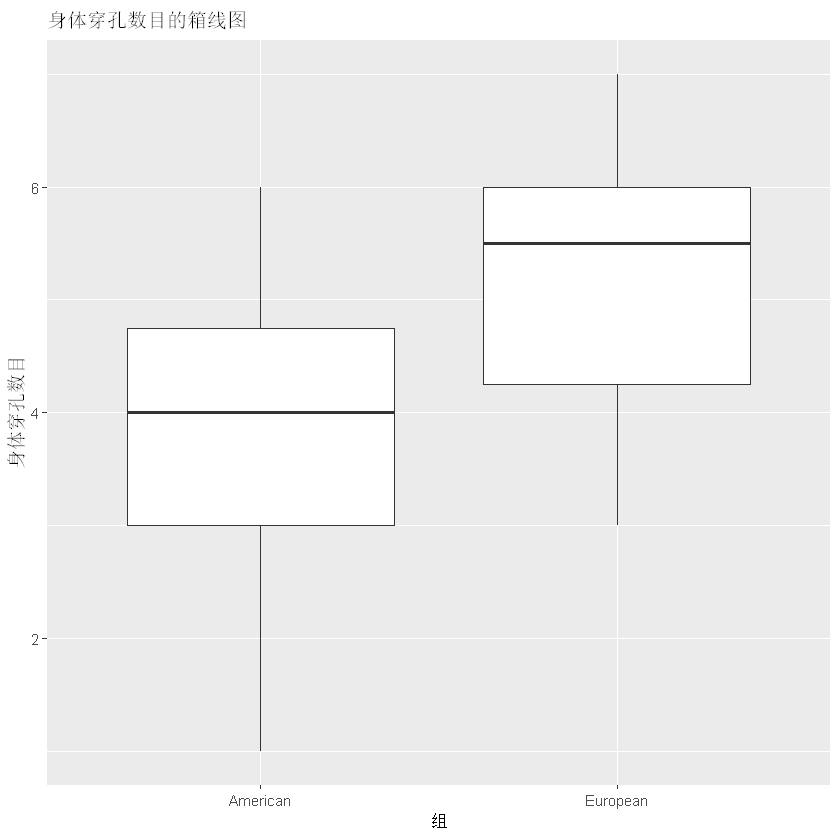

In [2]:
# 导入ggplot2包
library(ggplot2)

# 创建箱线图
ggplot(bp.survey, aes(x = group, y = bp)) +
    geom_boxplot() +
    labs(title = "身体穿孔数目的箱线图", x = "组", y = "身体穿孔数目")

有差异，欧洲明显平均数目比较多，分布更密集且中位数偏高，最小值最大值还有上下四分位数都比较高；美国平均数目少，分布更分散，中位数偏低，最小值最大值还有上下四分位数都比较小。

### 2. 使用 t 检验（t-test）判断美国和欧洲海盗身上穿孔数目是否有差异，零假设是没有差异，备择假设是有差异，请将 t-test 结果保存在 R 变量 p.test 中，查看 p.test 对象内容，依据对象内容来回答 “美国和欧洲海盗身上穿孔数目是否有差异”这个问题。

In [4]:
# 进行t检验
p.test <- t.test(bp ~ group, data = bp.survey)

# 查看p.test对象内容
print(p.test)


	Welch Two Sample t-test

data:  bp by group
t = -2.5228, df = 17.783, p-value = 0.0214
alternative hypothesis: true difference in means between group American and group European is not equal to 0
95 percent confidence interval:
 -2.9335927 -0.2664073
sample estimates:
mean in group American mean in group European 
                   3.7                    5.3 



- `t = -2.5228`：这是t统计量的值。t统计量是样本均值差异的度量，考虑了样本大小和样本标准差。t值的负号表示美国海盗的平均穿孔数目小于欧洲海盗。

- `df = 17.783`：这是自由度的数量。自由度是可以自由变化的参数的数量。

- `p-value = 0.0214`：这是p值，用于判断检验的结果是否具有统计学意义。在这个例子中，p值小于0.05，意味着我们有足够的证据来拒绝零假设（即，美国和欧洲海盗身上穿孔数目没有差异）。换句话说，我们的数据显示出美国和欧洲海盗身上穿孔数目有显著的差异。

- `95 percent confidence interval: -2.9335927 -0.2664073`：这是均值差异的95%置信区间。这个区间表示，如果我们多次从同一个总体中抽样并计算均值差异，那么这个差异有95%的概率落在这个区间内。

- `mean in group American 3.7 mean in group European 5.3`：这是两个样本的平均穿孔数目。美国海盗的平均穿孔数目是3.7，欧洲海盗的平均穿孔数目是5.3。

综上，我们可以得出结论：美国和欧洲海盗身上穿孔数目存在显著的差异，欧洲海盗的平均穿孔数目多于美国海盗。

### 3. 使用 t 检验（t-test）判断 29 岁和 30 岁海盗的文身情况是否有差异，零假设是没有差异，备择假设是有差异，请将 t-test 结果保存在 R 变量 t.test 中，查看 t.test 对象内容，依据对象内容来回答 “29 岁和 30 岁海盗的文身情况是否有差异”这个问题。

In [10]:
# 创建29岁和30岁海盗的文身数据子集
tattoos_29 <- pirates$tattoos[pirates$age == 29]
tattoos_30 <- pirates$tattoos[pirates$age == 30]

# 进行t检验
t.test <- t.test(tattoos_29, tattoos_30)

# 查看t.test对象内容
print(t.test)


	Welch Two Sample t-test

data:  tattoos_29 and tattoos_30
t = 0.26552, df = 119.15, p-value = 0.7911
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.058586  1.386455
sample estimates:
mean of x mean of y 
10.081967  9.918033 



- `t = 0.26552`：这是t统计量的值。t统计量是样本均值差异的度量，考虑了样本大小和样本标准差。t值接近0，表示29岁和30岁海盗的平均文身数目差异不大。

- `df = 119.15`：这是自由度的数量。自由度是可以自由变化的参数的数量。

- `p-value = 0.7911`：这是p值，用于判断检验的结果是否具有统计学意义。在这个例子中，p值大于0.05，意味着我们没有足够的证据来拒绝零假设（即，29岁和30岁海盗的文身情况没有差异）。换句话说，我们的数据没有显示出29岁和30岁海盗的文身情况有显著的差异。

- `95 percent confidence interval: -1.058586 1.386455`：这是均值差异的95%置信区间。这个区间表示，如果我们多次从同一个总体中抽样并计算均值差异，那么这个差异有95%的概率落在这个区间内。

- `mean of x mean of y: 10.081967 9.918033`：这是两个样本的平均文身数目。29岁海盗的平均文身数目是10.08，30岁海盗的平均文身数目是9.92。

综上，我们可以得出结论：29岁和30岁海盗的文身情况没有显著的差异。

### 4. 卡方检验(Chi-square test)可以用来判断一个因子变量是否依赖另一个因子变量，请考察一个海盗上的大学和海盗是否佩戴眼罩是否有关联，使用卡方检验，将结果保存在 R 变量c.test 中，查看 c.test 对象内容，依据对象内容来回答 “一个海盗上的大学和海盗是否佩戴眼罩是否有关联”这个问题

In [18]:
# 创建列联表
table <- table(pirates$college, pirates$eyepatch)
# 进行卡方检验
c.test <- chisq.test(table)
# 查看c.test对象内容
print(c.test)


	Pearson's Chi-squared test with Yates' continuity correction

data:  table
X-squared = 0, df = 1, p-value = 1



- `X-squared = 0`：这是卡方统计量的值。卡方统计量是观察频数和期望频数之间差异的度量。在这个例子中，卡方统计量为0，意味着观察频数和期望频数完全一致。

- `df = 1`：这是自由度的数量。自由度是可以自由变化的参数的数量。在卡方检验中，自由度通常等于`(行数-1) * (列数-1)`。

- `p-value = 1`：这是p值，用于判断检验的结果是否具有统计学意义。在这个例子中，p值为1，意味着我们没有足够的证据来拒绝零假设（即，海盗的大学和是否佩戴眼罩是独立的）。换句话说，我们的数据没有显示出这两个变量之间有显著的关联。

综上，我们可以得出结论：一个海盗上的大学和海盗是否佩戴眼罩没有显著的关联。